###Ordenamiento Topológico


In [1]:
import graphviz as gv

In [14]:
%%file 06vesturario.txt
reloj:
ropa_interior: pantalones zapatos
medias: zapatos
pantalones: zapatos correa
camiseta: correa corbata
zapatos:
correa: chaqueta
corbata: chaqueta
chaqueta:

Overwriting 06vesturario.txt


In [15]:
with open("06vesturario.txt") as f:
  labels = []
  w2i = dict()
  info = []
  for line in f:
    node, neighbours = [elem.strip() for elem in line.split(":")]
    neighbours = neighbours.split()
    w2i[node] = len(labels)
    labels.append(node)
    info.append(neighbours)

 

In [16]:
G = []
for neighbours in info:
  G.append([w2i[node] for node in neighbours])
    
print(w2i)
print(labels)
print(G)

{'reloj': 0, 'ropa_interior': 1, 'medias': 2, 'pantalones': 3, 'camiseta': 4, 'zapatos': 5, 'correa': 6, 'corbata': 7, 'chaqueta': 8}
['reloj', 'ropa_interior', 'medias', 'pantalones', 'camiseta', 'zapatos', 'correa', 'corbata', 'chaqueta']
[[], [3, 5], [5], [5, 6], [6, 7], [], [8], [8], []]


In [17]:
def show(G, labels=None, directed=False, weighted=False, path=[], layout="sfdp"):
  g = gv.Digraph("direccionado") if directed else gv.Graph("no-direccionado")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.edge_attr["fontsize"] = "8"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  n = len(G)

  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))

  added = set()
  for v, u in enumerate(path):
    if u >= 0:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break

        g.edge(str(u), str(v), str(w), dir="forward", penwidt="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidt="2", color="orange")

      added.add(f"{u}->{v}")
      added.add(f"{v}->{u}")
  if weighted:
    for u in range(n):
      for v, w in G[u]:
        if not directed and not f"{u}->{v}" in added:
          added.add(f"{u}->{v}")
          added.add(f"{v}->{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in G[u]:
        if not directed and not f"{u}->{v}" in added:
          added.add(f"{u}->{v}")
          added.add(f"{v}->{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

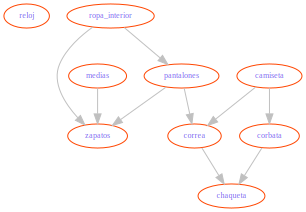

In [18]:
show(G, directed=True, labels=labels, layout="dot")

In [19]:
#ORDENAMIENTO TOPOLOGICO
def toposort(G):
  n = len(G)
  visited = [False]*n
  ts = []

  def dfs(u):
    visited[u] = True
    for v in G[u]:
      if not visited[v]:
        dfs(v)
    ts.append(u)

  for u in range(n):
    if not visited[u]:
      dfs(u)

  return ts

In [20]:
ts = toposort(G)
print([labels[u] for u in reversed(ts)])

['camiseta', 'corbata', 'medias', 'ropa_interior', 'pantalones', 'correa', 'chaqueta', 'zapatos', 'reloj']


In [21]:
def toposort1(G):
  n = len(G)
  gradoin = [0]*n
  queue = []

  for u in range(n):
    for v in G[u]:
      gradoin[v] += 1

  for u, grado in enumerate(gradoin):
    if grado == 0:
      queue.append(u)

  ts = []
  while queue:
    u = queue.pop()
    ts.append(u)
    for v in G[u]:
      gradoin[v] -= 1
      if gradoin[v] == 0:
        queue.append(v)

  return ts

In [22]:
ts = toposort1(G)
print([labels[u] for u in ts])

['camiseta', 'corbata', 'medias', 'ropa_interior', 'pantalones', 'correa', 'chaqueta', 'zapatos', 'reloj']
